# Introduction

In this workshop, I will show you how to build Artificial Neural Network(ANN) and how to tune its hyperparameters. I will use Digit Recognizer data set that is very famous among "Kagglers" who is specially interested in Neural Network. The data sets consist of the number of hand written digits that range from 0 to 9. The size og digits' photos er 28x28 which means each photo has 784 features(pixels). Also the data set consist of tran  and test sets. Train sets dimension is (42000x784) that means there are 42000 different photos in the train set while the test set dimension is (28000x784).

**Metric:** I used "accuracy metric" as a metric to evaluate model performance.

**Train set splitting:** I splitted the train set as %66 of train and 33% of dev set.

<font color = 'blue'>
 Content:
   
   1. [Data Loading and Pre-processing](#1)
   
   2. [Building Model and Optimize Hyperparameters](#2)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#pd.set_option("display.max_rows", 999)
#pd.set_option("display.max_columns", 999)
#pd.reset_option("display.max_rows")
#pd.reset_option("display.max_columns")

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


<a id = '1'></a><br>
## 1. Data Loading and Pre-processing

In [2]:
# Data loading
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [3]:
# Lets look at 5 rows of train set
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Lets look at 5 rows of test set
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Target variable
y = train.pop("label")


In [6]:
# Lets look at 5 rows of the target variable
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [7]:
# Unique values and their frequiencies in the target variable
y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [8]:
# train set has 784 feature(pixels) and 42000 photos, test set has 784 feature and 28000 photos.  
train.shape,y.shape,test.shape

((42000, 784), (42000,), (28000, 784))

In [9]:
# Gets info quickly about data set
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [10]:
# Gets info quickly about data set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 251.2 MB


In [11]:
# Type of the values in y variable
y.dtype

dtype('int64')

**Note: Keras accepts data with type of float32, and normilizing pixels by dividing 255 will sharply increase the speed of the ANN.**

In [12]:
# scale the input values to type float32 and (normalize) the input values within the interval [0, 1]

train = train.astype('float32')/255
test = test.astype('float32')/255
y = y.astype('float32')



In [13]:
# Converting pandas Dataframe to numpy array
"""
Keras models accept three types of inputs:

NumPy arrays, just like Scikit-Learn and many other Python-based libraries. This is a good option if your data fits in memory.

TensorFlow Dataset objects. This is a high-performance option that is more suitable for datasets that do not fit in memory and that are streamed from disk or from a distributed filesystem.

Python generators that yield batches of data (such as custom subclasses of the keras.utils.Sequence class).
"""
train = pd.DataFrame.to_numpy(train)
test = pd.DataFrame.to_numpy(test)

In [14]:
# Splitting training set into train and dev set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.33, random_state=42)

In [15]:
# Y variable has 10 different classes. Therefore we need to represent each values in y as vector. 
# This converst for example  1 to [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.] vector. 
"""
# label encoding to y variable
from keras.utils import to_categorical
y = to_categorical(y, num_classes=10)
"""
y_onehot = tf.one_hot(y, depth=10)
y_onehot_train = tf.one_hot(y_train, depth=10)
y_onehot_test = tf.one_hot(y_test, depth=10)

<a id = '2'></a><br>
##  2. Building Model and Optimize Hyperparameters

In [47]:
from tensorflow import keras
# Importing libraries
from keras.models import Sequential              # creates sequential model
from keras.layers.core import Dense, Activation # creates layers and calls activation functions
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    Flatten
)

from kerastuner import HyperModel  # It helps to tune hyperparameters.

In [22]:
"""
Hyperparameter tuning is heart of  ANN model and it directly affects the performance of the model. We can tune hyperparameters such as:

Learning Rate : It determines how quick the model will learn. It should be selected carefully. If it is small, the model speed will be very slow which means the derivative 
of loss function goes to its minimum point very slowly. If it is very high, the derivative of the loss fucntion cannot reach to its global minimum point. 
Therefore I preffered to choose its values as 1e-2, 1e-3, 1e-4.

The number of nodes: Nodes are points of the Layers on ANN. We need to optimize them and it is very general that they can be choosen as 32,64,128,256 and 512. 

The number of layer: It determines the complexity of the ANN model like the nodes. If you choose very high number, it can result in "BİAS". If you choose very small like 2,
it may not be good to solve complex and non-linear problems. We use dense function to create layers.

Activation function: Normally ANN is the linear method (Z=W*X+b), but we use activation function to make ANN non-linear. The most famous activation functions are relu and 
tanh for layers. If you use binary classification, you need to use "sigmoid" funcion. If you classify more than 2 classes, you need to use "softmax" function.

L2 Regularization: Regularization is used to reduce "VARİANCE" problem. One of the regularization techniques is L2 that is added to loss function to punish the weights.
By doing this weights getting closer to zero which reduces the model complexity.

Dropout: It is another regularization techniues. It is based on to close some of nodes randomly in determined layers. It uses "BERNOULLİ PROBABLİTY" to determine which nodes 
is getting closed. It is very effective like L2 regularization. It is very commen to use both L2 and Dropout regularization.

Adam optimazation: There are different optimazation methods like "momentum" and "RMSProp" to speed the model and increase the model performance. "ADAM" optimization technique
uses noth momentum and RMSProp(Root Mean Square Prop)

Batch-size : It is based on to divide data into small datasets and train them. It increase the performance beside speeding model training time. Exponentially weighted avarages 
statistical technique is used to calculate avarage loss on this technique. 




"""
class AnnHyperModel(HyperModel): 
    def __init__(self, input_shape):
        self.input_shape = input_shape
        
        
    def build(self, hp):
        model = Sequential()
        model.add(
            layers.Dense(
                units=hp.Int('units', 8, 64, 4, default=8), 
                activation=hp.Choice(
                    'dense_activation', 
                    values=['relu', 'tanh', 'elu'],
                    default='relu'), 
                activity_regularizer=tf.keras.regularizers.l2(0.001),
                input_shape=input_shape) )
        
        model.add( 
            layers.Dense(
            units=hp.Int('units', 8, 64, 4, default=16), 
            activation=hp.Choice(
                'dense_activation', 
                values=['relu', 'tanh', 'elu'], 
                default='relu')))

        model.add( 
            layers.Dropout(
                hp.Float( 
                    'dropout',
                    min_value=0.0, 
                    max_value=0.1, 
                    default=0.005, 
                    step=0.01)))
        
    
        model.add(layers.Dense(10,activation = "softmax"))
        
        model.compile(
            optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',
                      values=[1e-2, 1e-3, 1e-4]))
            ,loss='mse',
            metrics=['accuracy'] )

        return model

In [23]:
input_shape = (X_train.shape[1],)
hypermodel = AnnHyperModel(input_shape)

In [24]:
from kerastuner.tuners import RandomSearch

In [28]:

tuner_rs = RandomSearch( hypermodel,
                        objective='val_accuracy', 
                        seed=42, 
                        max_trials=10, 
                        executions_per_trial=2)

In [30]:
# You can print a summary of the search space
tuner_rs.search_space_summary()

In [31]:
# fit the model to find best model
tuner_rs.search(X_train, y_onehot_train, epochs=10, validation_data=(X_test, y_onehot_test), verbose=2)

Epoch 1/10
880/880 - 2s - loss: 0.0424 - accuracy: 0.7544 - val_loss: 0.0417 - val_accuracy: 0.7577
Epoch 2/10
880/880 - 2s - loss: 0.0415 - accuracy: 0.7692 - val_loss: 0.0399 - val_accuracy: 0.7879
Epoch 3/10
880/880 - 2s - loss: 0.0426 - accuracy: 0.7603 - val_loss: 0.0419 - val_accuracy: 0.7556
Epoch 4/10
880/880 - 2s - loss: 0.0464 - accuracy: 0.7361 - val_loss: 0.0421 - val_accuracy: 0.7380
Epoch 5/10
880/880 - 2s - loss: 0.0468 - accuracy: 0.7364 - val_loss: 0.0462 - val_accuracy: 0.7218
Epoch 6/10
880/880 - 2s - loss: 0.0489 - accuracy: 0.7177 - val_loss: 0.0586 - val_accuracy: 0.5741
Epoch 7/10
880/880 - 2s - loss: 0.0500 - accuracy: 0.7119 - val_loss: 0.0507 - val_accuracy: 0.7120
Epoch 8/10
880/880 - 2s - loss: 0.0521 - accuracy: 0.6922 - val_loss: 0.0491 - val_accuracy: 0.7290
Epoch 9/10
880/880 - 2s - loss: 0.0502 - accuracy: 0.7088 - val_loss: 0.0552 - val_accuracy: 0.7158
Epoch 10/10
880/880 - 2s - loss: 0.0512 - accuracy: 0.7068 - val_loss: 0.0625 - val_accuracy: 0.7287

Epoch 1/10
880/880 - 2s - loss: 0.0347 - accuracy: 0.8311 - val_loss: 0.0222 - val_accuracy: 0.8988
Epoch 2/10
880/880 - 2s - loss: 0.0207 - accuracy: 0.9037 - val_loss: 0.0190 - val_accuracy: 0.9105
Epoch 3/10
880/880 - 2s - loss: 0.0181 - accuracy: 0.9150 - val_loss: 0.0177 - val_accuracy: 0.9139
Epoch 4/10
880/880 - 2s - loss: 0.0168 - accuracy: 0.9221 - val_loss: 0.0172 - val_accuracy: 0.9154
Epoch 5/10
880/880 - 2s - loss: 0.0159 - accuracy: 0.9264 - val_loss: 0.0161 - val_accuracy: 0.9234
Epoch 6/10
880/880 - 2s - loss: 0.0152 - accuracy: 0.9297 - val_loss: 0.0162 - val_accuracy: 0.9203
Epoch 7/10
880/880 - 2s - loss: 0.0147 - accuracy: 0.9326 - val_loss: 0.0160 - val_accuracy: 0.9232
Epoch 8/10
880/880 - 2s - loss: 0.0143 - accuracy: 0.9350 - val_loss: 0.0158 - val_accuracy: 0.9234
Epoch 9/10
880/880 - 2s - loss: 0.0139 - accuracy: 0.9380 - val_loss: 0.0158 - val_accuracy: 0.9236
Epoch 10/10
880/880 - 2s - loss: 0.0137 - accuracy: 0.9393 - val_loss: 0.0155 - val_accuracy: 0.9255

Epoch 1/10
880/880 - 2s - loss: 0.0279 - accuracy: 0.8742 - val_loss: 0.0205 - val_accuracy: 0.9123
Epoch 2/10
880/880 - 2s - loss: 0.0193 - accuracy: 0.9163 - val_loss: 0.0195 - val_accuracy: 0.9115
Epoch 3/10
880/880 - 2s - loss: 0.0175 - accuracy: 0.9256 - val_loss: 0.0193 - val_accuracy: 0.9096
Epoch 4/10
880/880 - 2s - loss: 0.0164 - accuracy: 0.9314 - val_loss: 0.0169 - val_accuracy: 0.9271
Epoch 5/10
880/880 - 2s - loss: 0.0155 - accuracy: 0.9372 - val_loss: 0.0181 - val_accuracy: 0.9179
Epoch 6/10
880/880 - 2s - loss: 0.0149 - accuracy: 0.9403 - val_loss: 0.0166 - val_accuracy: 0.9300
Epoch 7/10
880/880 - 2s - loss: 0.0145 - accuracy: 0.9432 - val_loss: 0.0158 - val_accuracy: 0.9338
Epoch 8/10
880/880 - 2s - loss: 0.0141 - accuracy: 0.9464 - val_loss: 0.0161 - val_accuracy: 0.9307
Epoch 9/10
880/880 - 2s - loss: 0.0139 - accuracy: 0.9468 - val_loss: 0.0154 - val_accuracy: 0.9349
Epoch 10/10
880/880 - 2s - loss: 0.0135 - accuracy: 0.9494 - val_loss: 0.0164 - val_accuracy: 0.9311

Epoch 1/10
880/880 - 3s - loss: 0.0693 - accuracy: 0.5644 - val_loss: 0.0467 - val_accuracy: 0.7851
Epoch 2/10
880/880 - 3s - loss: 0.0386 - accuracy: 0.8245 - val_loss: 0.0317 - val_accuracy: 0.8769
Epoch 3/10
880/880 - 3s - loss: 0.0276 - accuracy: 0.8964 - val_loss: 0.0243 - val_accuracy: 0.9056
Epoch 4/10
880/880 - 2s - loss: 0.0222 - accuracy: 0.9149 - val_loss: 0.0206 - val_accuracy: 0.9182
Epoch 5/10
880/880 - 2s - loss: 0.0191 - accuracy: 0.9246 - val_loss: 0.0183 - val_accuracy: 0.9258
Epoch 6/10
880/880 - 2s - loss: 0.0170 - accuracy: 0.9329 - val_loss: 0.0167 - val_accuracy: 0.9287
Epoch 7/10
880/880 - 2s - loss: 0.0154 - accuracy: 0.9390 - val_loss: 0.0154 - val_accuracy: 0.9339
Epoch 8/10
880/880 - 2s - loss: 0.0141 - accuracy: 0.9429 - val_loss: 0.0145 - val_accuracy: 0.9368
Epoch 9/10
880/880 - 2s - loss: 0.0130 - accuracy: 0.9480 - val_loss: 0.0136 - val_accuracy: 0.9389
Epoch 10/10
880/880 - 2s - loss: 0.0122 - accuracy: 0.9503 - val_loss: 0.0129 - val_accuracy: 0.9417

Epoch 1/10
880/880 - 2s - loss: 0.0400 - accuracy: 0.7439 - val_loss: 0.0426 - val_accuracy: 0.7146
Epoch 2/10
880/880 - 2s - loss: 0.0406 - accuracy: 0.7531 - val_loss: 0.0422 - val_accuracy: 0.7401
Epoch 3/10
880/880 - 2s - loss: 0.0437 - accuracy: 0.7372 - val_loss: 0.0505 - val_accuracy: 0.7257
Epoch 4/10
880/880 - 2s - loss: 0.0464 - accuracy: 0.7335 - val_loss: 0.0439 - val_accuracy: 0.7535
Epoch 5/10
880/880 - 2s - loss: 0.0462 - accuracy: 0.7135 - val_loss: 0.0484 - val_accuracy: 0.7408
Epoch 6/10
880/880 - 2s - loss: 0.0489 - accuracy: 0.7135 - val_loss: 0.0543 - val_accuracy: 0.7405
Epoch 7/10
880/880 - 2s - loss: 0.0509 - accuracy: 0.6920 - val_loss: 0.0514 - val_accuracy: 0.6728
Epoch 8/10
880/880 - 2s - loss: 0.0519 - accuracy: 0.6846 - val_loss: 0.0522 - val_accuracy: 0.7012
Epoch 9/10
880/880 - 2s - loss: 0.0522 - accuracy: 0.6746 - val_loss: 0.0499 - val_accuracy: 0.6777
Epoch 10/10
880/880 - 2s - loss: 0.0519 - accuracy: 0.6801 - val_loss: 0.0573 - val_accuracy: 0.6035

Epoch 1/10
880/880 - 2s - loss: 0.0303 - accuracy: 0.8536 - val_loss: 0.0205 - val_accuracy: 0.9060
Epoch 2/10
880/880 - 2s - loss: 0.0193 - accuracy: 0.9135 - val_loss: 0.0208 - val_accuracy: 0.9004
Epoch 3/10
880/880 - 2s - loss: 0.0174 - accuracy: 0.9233 - val_loss: 0.0177 - val_accuracy: 0.9198
Epoch 4/10
880/880 - 2s - loss: 0.0161 - accuracy: 0.9313 - val_loss: 0.0166 - val_accuracy: 0.9257
Epoch 5/10
880/880 - 2s - loss: 0.0154 - accuracy: 0.9338 - val_loss: 0.0158 - val_accuracy: 0.9299
Epoch 6/10
880/880 - 2s - loss: 0.0147 - accuracy: 0.9391 - val_loss: 0.0156 - val_accuracy: 0.9321
Epoch 7/10
880/880 - 2s - loss: 0.0143 - accuracy: 0.9419 - val_loss: 0.0152 - val_accuracy: 0.9351
Epoch 8/10
880/880 - 2s - loss: 0.0136 - accuracy: 0.9459 - val_loss: 0.0159 - val_accuracy: 0.9284
Epoch 9/10
880/880 - 2s - loss: 0.0136 - accuracy: 0.9462 - val_loss: 0.0154 - val_accuracy: 0.9333
Epoch 10/10
880/880 - 3s - loss: 0.0131 - accuracy: 0.9495 - val_loss: 0.0152 - val_accuracy: 0.9349

In [32]:
# choosing best model among the models
best_model = tuner_rs.get_best_models(num_models=1)[0] 
loss, mse = best_model.evaluate(X_test,y_onehot_test)

434/434 [==============================] - ETA: 0s - loss: 0.0108 - accuracy: 0.96 - ETA: 0s - loss: 0.0129 - accuracy: 0.94 - ETA: 0s - loss: 0.0128 - accuracy: 0.94 - ETA: 0s - loss: 0.0133 - accuracy: 0.94 - ETA: 0s - loss: 0.0131 - accuracy: 0.94 - ETA: 0s - loss: 0.0133 - accuracy: 0.94 - ETA: 0s - loss: 0.0130 - accuracy: 0.94 - ETA: 0s - loss: 0.0128 - accuracy: 0.94 - ETA: 0s - loss: 0.0128 - accuracy: 0.94 - ETA: 0s - loss: 0.0128 - accuracy: 0.94 - ETA: 0s - loss: 0.0129 - accuracy: 0.94 - 1s 1ms/step - loss: 0.0129 - accuracy: 0.9417


In [33]:
# Shows layers of the model
best_model.layers

In [34]:
# Shows weights of the model (w,b)
best_model.weights

[<tf.Variable 'dense/kernel:0' shape=(784, 32) dtype=float32, numpy=
 array([[ 0.05674104, -0.01352786, -0.01758518, ..., -0.0708273 ,
         -0.08358304,  0.06147327],
        [ 0.0549344 , -0.02178866, -0.00855763, ...,  0.00630506,
         -0.01228216, -0.07996556],
        [-0.05019264,  0.03597376, -0.06447023, ...,  0.05501612,
          0.01740073, -0.01145761],
        ...,
        [-0.04282255, -0.0755173 , -0.06505855, ..., -0.08535715,
         -0.04575186,  0.05818256],
        [-0.03975312,  0.02092221,  0.07825074, ...,  0.04816408,
          0.01555977, -0.0218576 ],
        [ 0.05946391,  0.02243678, -0.05928504, ..., -0.05080473,
         -0.03221198,  0.06400909]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(32,) dtype=float32, numpy=
 array([ 0.00173804,  0.0591086 , -0.0029832 ,  0.00903119,  0.10704599,
         0.02942726, -0.00595056,  0.00302725,  0.0314567 , -0.00777636,
         0.02910684, -0.00749242,  0.08771014, -0.01938568,  0.04341332,
      

In [35]:
# used to see the content of the model. It gives a summary of the model.
# here is the total number of parameters entering the nodes in each layer, which is called params. 
# There is 784 inputs in the first layer,that is, 784 w and 2 b and since there are 2 nodes, the total parameter entered into the nodes = 2 * 784 +2 = 1570
best_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [36]:
# model fitting
best_model.fit(X_train, y_onehot_train,
          batch_size=100, epochs=10)   # epochs = number of iterations

Epoch 1/10
282/282 [==============================] - ETA: 0s - loss: 0.0076 - accuracy: 0.98 - ETA: 0s - loss: 0.0111 - accuracy: 0.95 - ETA: 0s - loss: 0.0115 - accuracy: 0.95 - ETA: 0s - loss: 0.0118 - accuracy: 0.95 - ETA: 0s - loss: 0.0119 - accuracy: 0.95 - ETA: 0s - loss: 0.0116 - accuracy: 0.95 - ETA: 0s - loss: 0.0116 - accuracy: 0.95 - ETA: 0s - loss: 0.0117 - accuracy: 0.95 - ETA: 0s - loss: 0.0117 - accuracy: 0.95 - ETA: 0s - loss: 0.0116 - accuracy: 0.95 - ETA: 0s - loss: 0.0116 - accuracy: 0.95 - ETA: 0s - loss: 0.0115 - accuracy: 0.95 - ETA: 0s - loss: 0.0114 - accuracy: 0.95 - 1s 2ms/step - loss: 0.0114 - accuracy: 0.9547
Epoch 2/10
282/282 [==============================] - ETA: 0s - loss: 0.0111 - accuracy: 0.96 - ETA: 0s - loss: 0.0106 - accuracy: 0.95 - ETA: 0s - loss: 0.0114 - accuracy: 0.95 - ETA: 0s - loss: 0.0114 - accuracy: 0.95 - ETA: 0s - loss: 0.0112 - accuracy: 0.95 - ETA: 0s - loss: 0.0111 - accuracy: 0.95 - ETA: 0s - loss: 0.0111 - accuracy: 0.95 - ETA: 0

In [37]:
# Model evaluation
test_loss, test_acc = best_model.evaluate(X_test, y_onehot_test)
print("Dev set accuracy: ", test_acc)
print("Dev set loss: ", test_loss)

434/434 [==============================] - ETA: 0s - loss: 0.0080 - accuracy: 0.96 - ETA: 0s - loss: 0.0108 - accuracy: 0.95 - ETA: 0s - loss: 0.0109 - accuracy: 0.94 - ETA: 0s - loss: 0.0112 - accuracy: 0.94 - ETA: 0s - loss: 0.0111 - accuracy: 0.94 - ETA: 0s - loss: 0.0113 - accuracy: 0.94 - ETA: 0s - loss: 0.0110 - accuracy: 0.94 - ETA: 0s - loss: 0.0109 - accuracy: 0.95 - ETA: 0s - loss: 0.0108 - accuracy: 0.95 - ETA: 0s - loss: 0.0108 - accuracy: 0.95 - ETA: 0s - loss: 0.0109 - accuracy: 0.95 - ETA: 0s - loss: 0.0109 - accuracy: 0.94 - 1s 1ms/step - loss: 0.0109 - accuracy: 0.9497
Dev set accuracy:  0.9497113823890686
Dev set loss:  0.010879306122660637


## Confusion Matrix

"" In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one. ""

In [38]:
# Plot confusion matrix 
# Note: This code snippet for confusion-matrix is taken directly from the SKLEARN website.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual class')
    plt.xlabel('Predicted class')

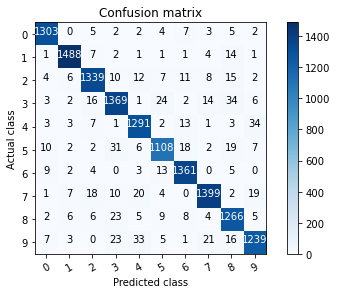

In [39]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = best_model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_onehot_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

# Prediction dev-set

In [40]:
# The Predict () method returns a vector containing the predictions of all dataset items.
predictions = best_model.predict(X_test)

In [41]:
# Returning the index of the position containing the highest value of the vector, we know which class gives the highest probability of belonging with the argmax function of Numpy.
np.argmax(predictions[9])

1

In [42]:
# We can use sum to see that all values ​​in a vector are zero. Because these are probability values.
np.sum(predictions[11])

1.0000001

# Prediction test-set

In [43]:
# The Predict () method returns a vector containing the predictions of all dataset items.
test_result = best_model.predict(test)

## Write results to csv 

In [44]:
# Saving the results to a csv file

# Convert one-hot vector to number
results = np.argmax(test_result,axis = 1) # this gives us the corresponding y value relative to the highest probability in the prediction vector, such as 2 or 3

results = pd.Series(results,name="Label")


submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("test_submission.csv",index=False)

## I AM LOOKING FORWARD TO YOUR COMMENTS AND UPVOTES 

## If you have any questi̇on, please donot hesi̇tate to ask.

